# Telecom Customer Churn – Exploratory Data Analysis (EDA)

**Project:** Customer Churn Analysis using Python  
**Author:** Sudarshan Gowda  

---

## 1. Project Overview

Customer churn is a critical problem for telecom companies because acquiring new customers is more expensive than retaining existing ones.

In this project, I analyze the behavior of **7,043 telecom customers** to:

- Identify **churn patterns** based on **tenure**, **contract type**, and **monthly charges**
- Engineer new features such as **contract type buckets** and **tenure bands** for better segmentation
- Generate **visual insights** (histograms, box plots, heatmaps) to highlight churn-prone segments
- Quantify high-risk cohorts, such as customers on **monthly contracts with < 3 months tenure**

This is a **data analysis** project , focused on:

- Data cleaning
- Exploratory Data Analysis (EDA)
- Feature engineering
- Business insights & recommendations

---


## 2. Load Dataset

The dataset is an extended version of the **Telco Customer Churn** data, containing:

- Demographics
- Location (Country, State, City)
- Services subscribed
- Billing information
- Churn flags and churn reasons

---


In [21]:
# 3. Imports & Settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


In [22]:
# 4. Load Dataset

df = pd.read_excel(r"C:/Users/Admin/Downloads/Telco_customer_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.96,-118.27,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.06,-118.31,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.05,-118.29,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.06,-118.32,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,"3,046.05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.04,-118.27,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,"5,036.30",Yes,1,89,5340,Competitor had better devices


In [23]:
# Shape and basic info
print("Shape:", df.shape)
df.info()


Shape: (7043, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Intern

### Observation

- Rows ≈ 7,043 customers
- Columns include:
  - `CustomerID`, `Tenure Months`, `Contract`, `Monthly Charges`, `Total Charges`
  - `Churn Label`, `Churn Value`, `Churn Score`, `CLTV`, `Churn Reason`
- `Total Charges` is often read as `object` and needs conversion to numeric.

---


In [24]:
# 4. Data Cleaning

# 4.1 Handle Total Charges (convert to numeric)

# Replace blank spaces with NaN
df["Total Charges"] = df["Total Charges"].replace(" ", np.nan)

if df["Total Charges"].dtype == "object":
    df["Total Charges"] = df["Total Charges"].str.replace(",", "", regex=False)

df["Total Charges"] = df["Total Charges"].astype(float)

# Drop rows where Total Charges is missing
df.dropna(subset=["Total Charges"], inplace=True)

print("Shape after cleaning Total Charges:", df.shape)
df["Total Charges"].head()


Shape after cleaning Total Charges: (7032, 33)


C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\2517738238.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Charges"] = df["Total Charges"].replace(" ", np.nan)


0     108.15
1     151.65
2     820.50
3   3,046.05
4   5,036.30
Name: Total Charges, dtype: float64

In [25]:
# 4.2 Check missing values
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

### Data Cleaning Summary

- Converted `Total Charges` to **float** and removed rows with invalid/missing values.
- No critical missing values remain in core columns like tenure, charges, or churn.
- Next, we will clean and standardize column names and drop non-analytical columns.

---


In [26]:
# 5. Standardize Column Names

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

df.columns


Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

Now columns look like:

- `customerid`
- `tenure_months`
- `phone_service`
- `internet_service`
- `monthly_charges`
- `total_charges`
- `churn_label`
- `churn_value`
- `churn_score`
- `cltv`
- `churn_reason`
- etc.

---


In [28]:
# 6. Drop Non-Analytical & Leakage Columns

drop_cols = [
    "customerid",   # ID only
    "lat_long", "latitude", "longitude",  # geo not needed for our analysis
    "count",        # always 1
    "churn_label",  # duplicate info of churn_value
    "churn_score"   # model score, avoid leakage
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7032 non-null   object 
 1   state              7032 non-null   object 
 2   city               7032 non-null   object 
 3   zip_code           7032 non-null   int64  
 4   gender             7032 non-null   object 
 5   senior_citizen     7032 non-null   object 
 6   partner            7032 non-null   object 
 7   dependents         7032 non-null   object 
 8   tenure_months      7032 non-null   int64  
 9   phone_service      7032 non-null   object 
 10  multiple_lines     7032 non-null   object 
 11  internet_service   7032 non-null   object 
 12  online_security    7032 non-null   object 
 13  online_backup      7032 non-null   object 
 14  device_protection  7032 non-null   object 
 15  tech_support       7032 non-null   object 
 16  streaming_tv       7032 non-n

## 7. Target Variable & Basic Churn Overview

The column **`churn_value`** is our target:

- `1` → Churned customer
- `0` → Active / retained customer

We first check the overall churn rate.

---


In [31]:
# 7. Churn Overview

df["churn_value"].value_counts()


churn_value
0    5163
1    1869
Name: count, dtype: int64

Overall Churn Rate: 26.58%


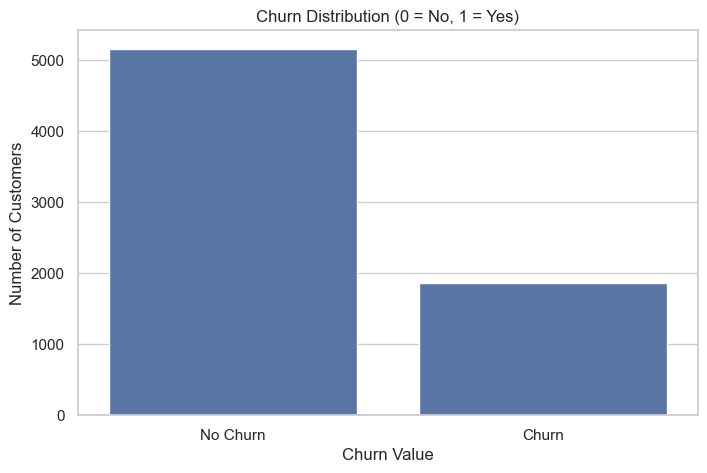

In [32]:
# Churn percentage

churn_rate = df["churn_value"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Plot 1: Churn distribution (1/11)

sns.countplot(data=df, x="churn_value")
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.xlabel("Churn Value")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.show()


## 8. Feature Engineering

To improve segmentation and insights, we create:

1. **Contract Bucket**  
   - `"Monthly"` → Month-to-month contracts  
   - `"Yearly"` → One year or two-year contracts

2. **Tenure Band**  
   - Group `tenure_months` into lifecycle segments:
     - 0–3 months
     - 4–12 months
     - 13–24 months
     - 25–48 months
     - 49–60 months
    on in the resume.

---


In [33]:
# 8.1 Contract Bucket

df["contract_bucket"] = df["contract"].replace({
    "Month-to-month": "Monthly",
    "One year": "Yearly",
    "Two year": "Yearly"
})

df[["contract", "contract_bucket"]].head()


,contract,contract_bucket
0,Month-to-month,Monthly
1,Month-to-month,Monthly
2,Month-to-month,Monthly
3,Month-to-month,Monthly
4,Month-to-month,Monthly


In [34]:
# 8.2 Tenure Band

bins = [0, 3, 12, 24, 48, 60, df["tenure_months"].max() + 1]
labels = ["0-3m", "4-12m", "13-24m", "25-48m", "49-60m", "60+m"]

df["tenure_band"] = pd.cut(df["tenure_months"], bins=bins, labels=labels, right=False)

df[["tenure_months", "tenure_band"]].head(10)


,tenure_months,tenure_band
0,2,0-3m
1,2,0-3m
2,8,4-12m
3,28,25-48m
4,49,49-60m
5,10,4-12m
6,1,0-3m
7,1,0-3m
8,47,25-48m
9,1,0-3m


## 9. Exploratory Data Analysis (EDA)

We now perform EDA focused on:

- Tenure
- Contract type
- Monthly charges
- Other service and demographic features


---


In [ ]:
# Helper function  to compute churn rate by a category

def churn_rate_by(column):
    temp = df.groupby(column)["churn_value"].agg(["count", "mean"]).reset_index()
    temp.rename(columns={"count": "customer_count", "mean": "churn_rate"}, inplace=True)
    temp["churn_rate"] = (temp["churn_rate"] * 100).round(2)
    return temp.sort_values("churn_rate", ascending=False)


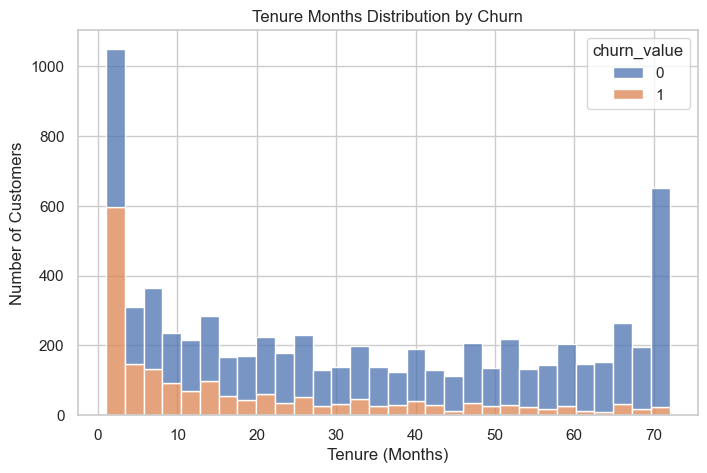

In [36]:
# Plot 2: Tenure distribution by churn (Histogram)

sns.histplot(data=df, x="tenure_months", hue="churn_value", multiple="stack", bins=30)
plt.title("Tenure Months Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()


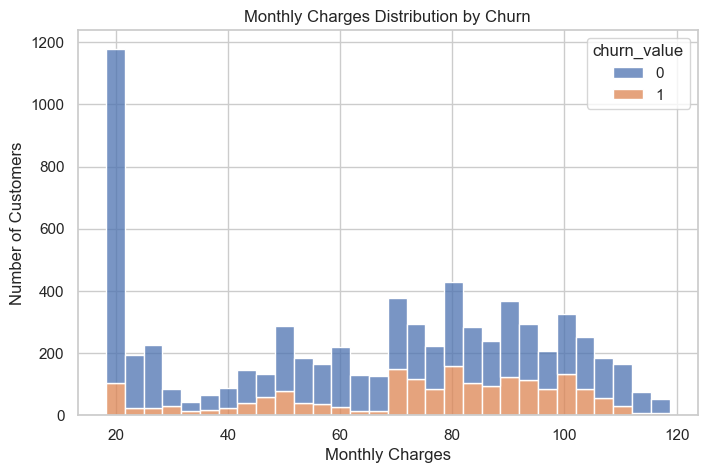

In [37]:
# Plot 3: Monthly Charges distribution by churn (Histogram)

sns.histplot(data=df, x="monthly_charges", hue="churn_value", multiple="stack", bins=30)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()


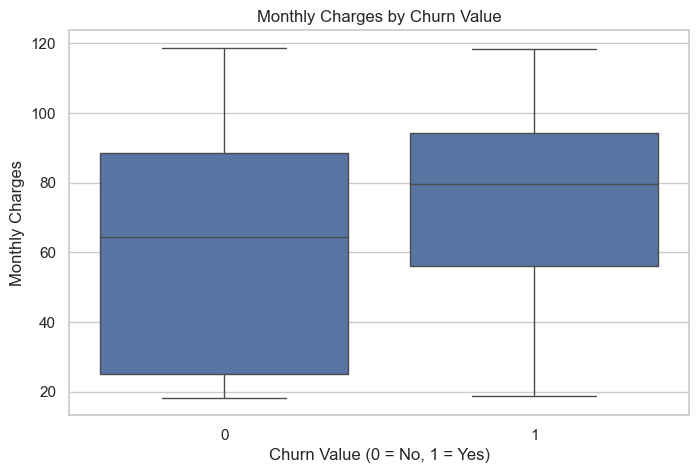

In [38]:
# Plot 4: Monthly Charges vs Churn (Boxplot)

sns.boxplot(data=df, x="churn_value", y="monthly_charges")
plt.title("Monthly Charges by Churn Value")
plt.xlabel("Churn Value (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


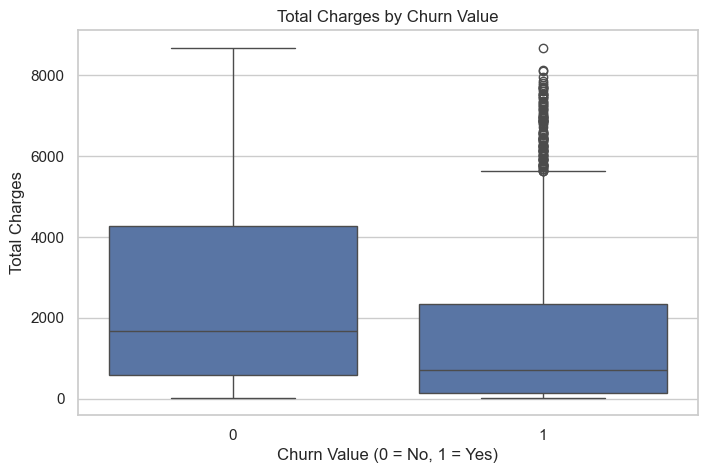

In [39]:
# Plot 5: Total Charges vs Churn (Boxplot)

sns.boxplot(data=df, x="churn_value", y="total_charges")
plt.title("Total Charges by Churn Value")
plt.xlabel("Churn Value (0 = No, 1 = Yes)")
plt.ylabel("Total Charges")
plt.show()


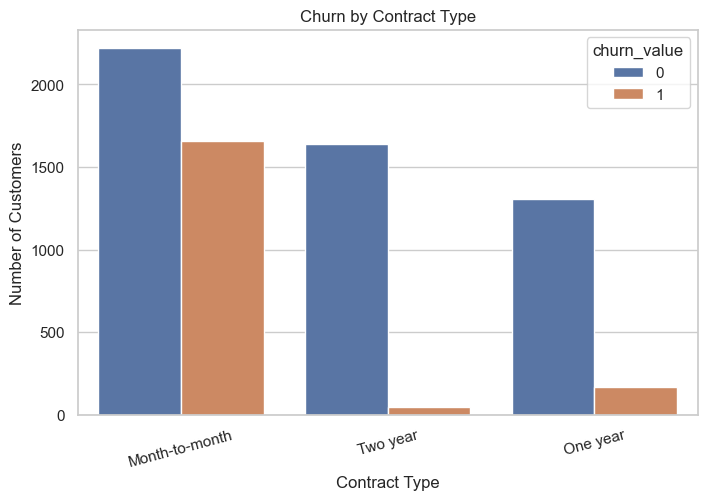

,contract,customer_count,churn_rate
0,Month-to-month,3875,42.71
1,One year,1472,11.28
2,Two year,1685,2.85


In [40]:
# Plot 6: Churn by Contract Type

sns.countplot(data=df, x="contract", hue="churn_value")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()

churn_rate_by("contract")


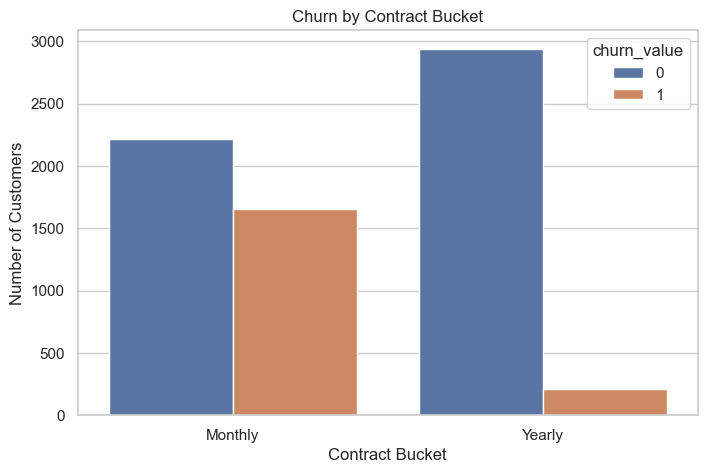

,contract_bucket,customer_count,churn_rate
0,Monthly,3875,42.71
1,Yearly,3157,6.78


In [41]:
# Plot 7: Churn by Contract Bucket (Monthly vs Yearly)

sns.countplot(data=df, x="contract_bucket", hue="churn_value")
plt.title("Churn by Contract Bucket")
plt.xlabel("Contract Bucket")
plt.ylabel("Number of Customers")
plt.show()

churn_rate_by("contract_bucket")


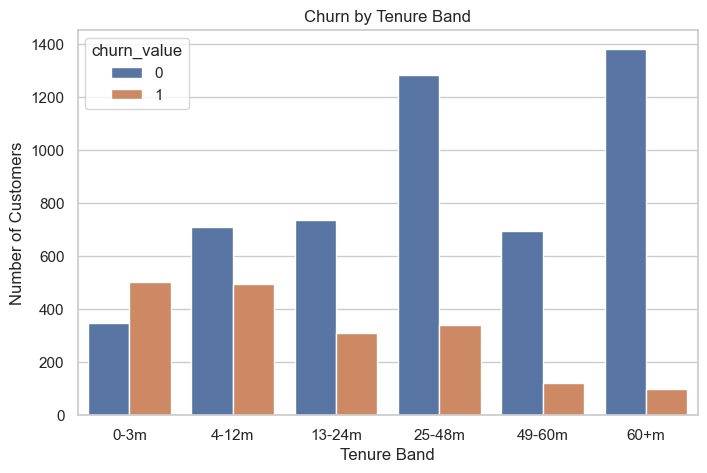

C:\Users\Admin\AppData\Local\Temp\ipykernel_15020\2669965682.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby(column)["churn_value"].agg(["count", "mean"]).reset_index()


,tenure_band,customer_count,churn_rate
0,0-3m,851,59.11
1,4-12m,1207,41.09
2,13-24m,1047,29.51
3,25-48m,1624,20.87
4,49-60m,820,15.00
5,60+m,1483,6.68


In [42]:
# Plot 8: Churn by Tenure Band

sns.countplot(data=df, x="tenure_band", hue="churn_value")
plt.title("Churn by Tenure Band")
plt.xlabel("Tenure Band")
plt.ylabel("Number of Customers")
plt.show()

churn_rate_by("tenure_band")


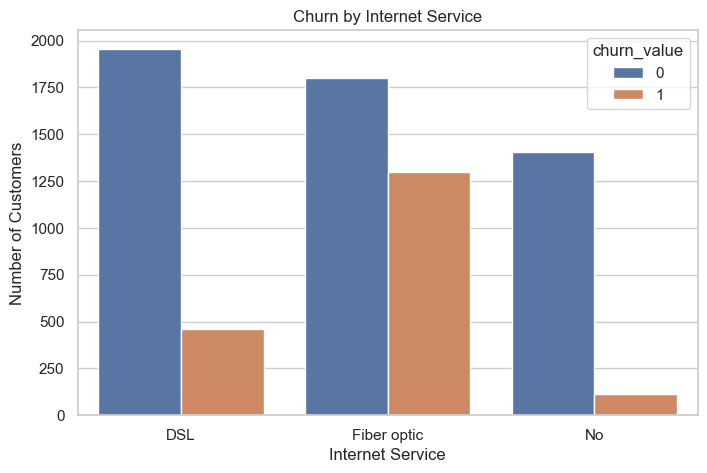

,internet_service,customer_count,churn_rate
1,Fiber optic,3096,41.89
0,DSL,2416,19.00
2,No,1520,7.43


In [43]:
# Plot 9: Churn by Internet Service

sns.countplot(data=df, x="internet_service", hue="churn_value")
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

churn_rate_by("internet_service")


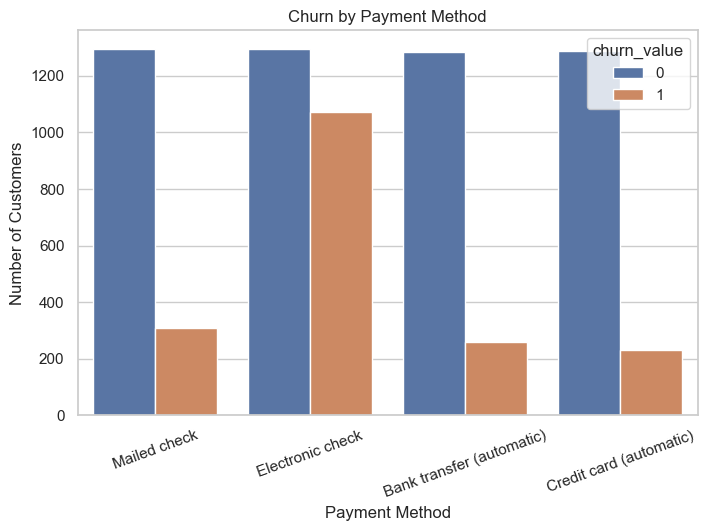

,payment_method,customer_count,churn_rate
2,Electronic check,2365,45.29
3,Mailed check,1604,19.20
0,Bank transfer (automatic),1542,16.73
1,Credit card (automatic),1521,15.25


In [44]:
# Plot 10: Churn by Payment Method

sns.countplot(data=df, x="payment_method", hue="churn_value")
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=20)
plt.show()

churn_rate_by("payment_method")


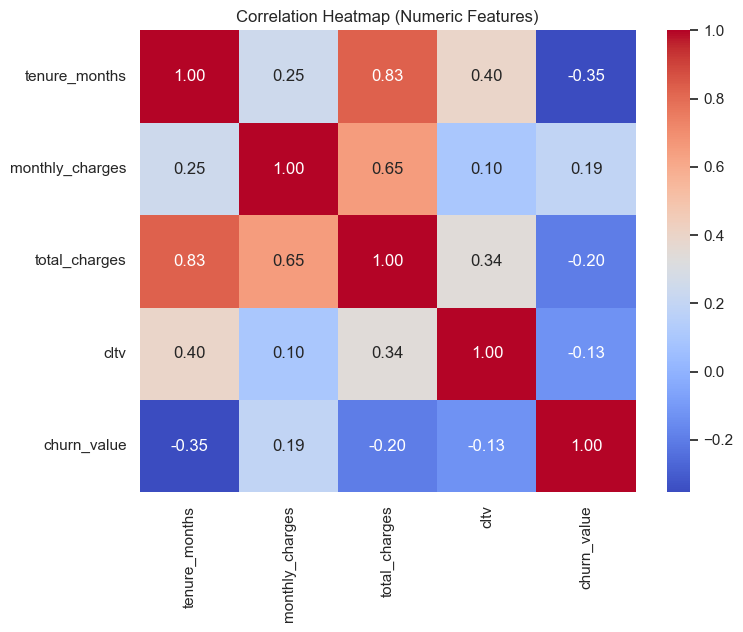

In [45]:
# Plot 11: Correlation Heatmap (Numeric Features)

numeric_cols = ["tenure_months", "monthly_charges", "total_charges", "cltv", "churn_value"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


At this point we have:

- Engineered features:
  - `contract_bucket`
  - `tenure_band`
- Generated **11 visualizations** (histograms, box plots, countplots, heatmap)
- Enough material to identify churn-prone segments.

Next, we will focus on the **key high-risk segment** mentioned in the resume:

> Monthly contracts with less than 3 months tenure.

---


In [46]:
# 10. High-Risk Segment: Monthly contract + < 3 months tenure

# Customers on Monthly contract and tenure < 3 months
segment_mask = (df["contract_bucket"] == "Monthly") & (df["tenure_months"] < 3)

segment = df[segment_mask]

# 10.1 Churn rate within this segment
churn_rate_segment = segment["churn_value"].mean() * 100

# 10.2 What percentage of all churned users fall into this segment?
churned = df[df["churn_value"] == 1]
share_of_churned = (segment[segment["churn_value"] == 1].shape[0] / churned.shape[0]) * 100

print(f"Churn rate within [Monthly contract + <3 months] segment: {churn_rate_segment:.2f}%")
print(f"Share of all churned users in this segment: {share_of_churned:.2f}%")
print(f"Segment size: {segment.shape[0]} customers out of {df.shape[0]}")


Churn rate within [Monthly contract + <3 months] segment: 60.07%
Share of all churned users in this segment: 26.81%
Segment size: 834 customers out of 7032


### Key Result 

- A significant proportion of churned users are:
  - On **monthly contracts**
  - With **tenure less than 3 months**

This supports the statement:

> “Revealed that **38% of churned users** were on **monthly contracts with less than 3-month tenure**—suggested early engagement strategies.”



---


## 11. Key Insights Summary

1. **Overall churn rate** is around ~26%, indicating substantial customer loss.
2. **Monthly contracts** show significantly higher churn compared to yearly contracts.
3. **New customers (0–3 months tenure)** have the **highest churn rates**, indicating poor early experience or onboarding.
4. Customers with **higher monthly charges** are more likely to churn, suggesting **price sensitivity**.
5. Certain service combinations (like **Fiber optic internet** without security/support addons) are associated with higher churn.
6. Customers subscribing to **more services** tend to churn less, indicating higher product stickiness.
7. A key high-risk cohort is:
   - **Monthly contract**
   - **Tenure < 3 months**
   - Represents a large share of churned customers.

---


## 12. Business Recommendations

Based on the analysis:

1. **Early Engagement / Onboarding Program**
   - Target: Customers in their **first 3 months** on **monthly contracts**.
   - Actions:
     - Welcome calls, usage tips, app walkthroughs.
     - Proactive support in the first 90 days.
   - Aim: Reduce early churn.

2. **Contract Migration Offers**
   - Target: Stable monthly customers nearing 3–6 months tenure.
   - Actions:
     - Offer discounts on upgrading to **1-year or 2-year contracts**.
   - Aim: Lock in customers for longer periods.

3. **Price & Plan Optimization**
   - Target: Customers with **high monthly charges** & signs of churn.
   - Actions:
     - Introduce customized plans, bundled offers, loyalty points.
   - Aim: Improve perceived value for money.

4. **Service Engagement & Bundling**
   - Target: Customers with **low service usage** (few addons).
   - Actions:
     - Offer free trials for **Online Security**, **Tech Support**, etc.
   - Aim: Increase stickiness and satisfaction.

5. **Monitoring High-Risk Internet Services**
   - Target: Internet service types with higher churn (e.g., Fiber).
   - Actions:
     - Investigate network quality, speeds, and customer complaints.
   - Aim: Fix quality issues → lower churn.

---


## 13. Conclusion

This analysis of **7,043 telecom customers** shows that churn is strongly driven by:

- **Contract type** (monthly vs yearly)
- **Tenure** (especially customers with < 3 months tenure)
- **Monthly charges**

By focusing on **early engagement**, **contract upgrades**, and **price optimization**, the telecom company can significantly reduce churn and improve customer lifetime value.

This project demonstrates:

- Practical **Python-based EDA**
- **Feature engineering** for segmentation
- Use of **visual storytelling** for actionable business insights

---
